# Project: Wrangling and Analyze Data

# INTRODUCTION
L'objectif de ce projet est de renforcer tout ce que vous avez appris dans le module 2 sur la préparation des données à l'aide du programme NANODEGREE DATA ANALYST d'UDACITY. L'ensemble de données est extrait du compte Twitter @dog_rates, également connu sous le nom de WeRateDogs.

## IMPORTATION DES LIBRAIRIES

In [1]:
import pandas as pd
import numpy as np
import requests
import json
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_colwidth', -1)

## Data Gathering
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [2]:
twitter_arc= pd.read_csv('twitter-archive-enhanced.csv')
#On trie les tweet selon l'ordre croissant du timestamp
twitter_arc.sort_values('timestamp')
#On visualiser notre datframe
twitter_arc.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [3]:
url=  'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response= requests.get(url)
with open('predictions.tsv', mode='wb') as file:
    file.write(response.content)
prediction= pd.read_table('predictions.tsv')
prediction.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [4]:
with open('tweet-json.txt') as f:
    twit_api= pd.DataFrame((json.loads(line)for line in f), columns=['id','favorite_count','retweet_count'])
twit_api.columns=['tweet_id','favorites','retweets']
#twit_api.set_index('tweet_id', inplace=True)
twit_api.head()

,tweet_id,favorites,retweets
0,892420643555336193,39467,8853
1,892177421306343426,33819,6514
2,891815181378084864,25461,4328
3,891689557279858688,42908,8964
4,891327558926688256,41048,9774


## Assessing Data

### VISUAL ASSESSMENT
Chaque dataset sera affiché pour des buts d'evaluations visuelles

In [5]:
twitter_arc

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950875897856/photo/1,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,https://twitter.com/dog_rates/status/890971913173991426/photo/1",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/890729181411237888/photo/1,https://twitter.com/dog_rates/status/890729181411237888/photo/1",13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Zoey. She doesn't want to be one of the scary sharks. Just wants to be a snuggly pettable boatpet. 13/10 #BarkWeek https://t.co/9TwLuAGH0b,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185150312448/photo/1,13,10,Zoey,None,None,None,None
9,89024025534

In [6]:
prediction

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [7]:
twit_api

,tweet_id,favorites,retweets
0,892420643555336193,39467,8853
1,892177421306343426,33819,6514
2,891815181378084864,25461,4328
3,891689557279858688,42908,8964
4,891327558926688256,41048,9774
5,891087950875897856,20562,3261
6,890971913173991426,12041,2158
7,890729181411237888,56848,16716
8,890609185150312448,28226,4429
9,890240255349198849,32467,7711


### PROGRAMMATIC ASSESSMENT

In [ ]:
twitter_arc.info()

In [ ]:
sum(twitter_arc['tweet_id'].duplicated())

In [ ]:
sum(twitter_arc['name'].duplicated())

In [ ]:
twitter_arc.name.value_counts()

In [ ]:
twitter_arc[twitter_arc.rating_numerator == 75]

In [ ]:
twitter_arc.rating_numerator.value_counts()

In [ ]:
twitter_arc[twitter_arc.name=='None']

In [ ]:
twitter_arc.rating_denominator.value_counts()

In [ ]:
prediction

In [ ]:
prediction[prediction['jpg_url'].duplicated()].jpg_url.value_counts()

In [ ]:
twitter_arc.source.value_counts()

## Quality issues
### TWITTER ARCHIVES
1. Presence des retweet car on veut les ratings d'origines

2. Suppression les colonnes qui ne vont pas nous servir pour l'analyse

3. Separation de la colonne timestamp en Annee, mois , jour)

4. Animaux ayant pour nom 'None' qui ne sont pas de chiens

5. Mauvais types des colonnes doggo, pupper, puppo et floofer

6. Colonne timestamp est en type object 

7. La colonne tweet_id est en type entier

8. Types de données incorrect dans la colonne rating_numerator et rating_denominator

### IMAGE PREDICTIONS
1. Des traits a la place des espaces dans les colonnes p1, p2 et p3

2. Melange de lettre majuscules et minuscules en debut dans la colonne p1, p2 et p3

3. Suppression les colonnes qui ne seront pas utiles pour notre analyse

4. Les doublons dans la colonne 'jpg_url'

5. Le type de tweet_id qui doit etre en chaines de caracteres

6. Noms des colonnes pas assez explicite

7. Conversion des colonnes de predictions en pourcentage  

### TWEET JSON
1. Conversion de  la colonne tweet_id en chaine de caractere

### Tidiness issues
#### TWITTER ARCHIVE
1. Rassembler les colonnes doggo, puppo , puppo et floofer comme categorie dans une nouvelle categorie

2. La colonne source est  désordonnée à cause des urls et donc un peu difficile à interpréter.
#### PREDICTION
1. Fusionner cette table a celle de twitter archives
#### TWEET JSON
1. Ajout de la colonne favoris a twitter archives.

## Cleaning Data


In [8]:
# Make copies of original pieces of data
twitter_arc_clean= twitter_arc.copy()
prediction_clean= prediction.copy()
twit_api_clean= twit_api.copy()

## TWITTER ARCHIVES
### Issue #1:

#### Define:
Supprimer tous les retweets en supprimant toutes les lignes avec les  valeurs non nul dans  retweet_status_id

#### Code

In [11]:
twitter_arc_clean = twitter_arc_clean[twitter_arc_clean.retweeted_status_id.isnull()]

#### Test

In [12]:
twitter_arc_clean[twitter_arc_clean.retweeted_status_id.notnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


### Issue #2:

#### Define
Supprimer  les colonnes inutiles ( in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id et retweeted_status_timestamp )

#### Code

In [ ]:
twitter_arc_clean = twitter_arc_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id',
                                                      'retweeted_status_id', 'retweeted_status_user_id',
                                                      'retweeted_status_timestamp','source','expanded_urls'], axis = 1)

#### Test

In [13]:
twitter_arc_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None


### Issue #3:

#### Define
Separation de la colonne timestamp

#### CODE

In [14]:
#Convertir la colonne timestap en date
twitter_arc_clean['timestamp'] = pd.to_datetime(twitter_arc_clean['timestamp'])
# separtion de la colonne en 3 : Annee , Mois et Jour
twitter_arc_clean['year'] = twitter_arc_clean['timestamp'].dt.year
twitter_arc_clean['month'] = twitter_arc_clean['timestamp'].dt.month
twitter_arc_clean['day'] = twitter_arc_clean['timestamp'].dt.day
#Apres on supprime la colonne timestamp
twitter_arc_clean = twitter_arc_clean.drop('timestamp', 1)

#### Test

In [15]:
twitter_arc_clean.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'source',
       'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo',
       'year', 'month', 'day'],
      dtype='object')

### Issue #4:

#### Define
Creation de la colonne 'Dog type' qui va rassembler les colonnes (doggo, puppo, pupper et floofer)

#### CODE

In [16]:
#Creation de la colonne 'Dog_type'
twitter_arc_clean['Dog_type'] = twitter_arc_clean.text.str.extract('(doggo | floofer | pupper | puppo)', expand = True)
twitter_arc_clean.Dog_type = twitter_arc_clean.Dog_type.str.strip()
#Suppresion des colonnes doggo, pupper, puppo et floofer
twitter_arc_clean = twitter_arc_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis = 1)
#Changement du type de la colonne 'Dog_type' en type categorie
twitter_arc_clean.Dog_type = twitter_arc_clean.Dog_type.astype('category')

#### Test

In [17]:
twitter_arc_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,year,month,day,Dog_type
0,892420643555336193,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,2017,8,1,NaN
1,892177421306343426,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,2017,8,1,NaN
2,891815181378084864,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,2017,7,31,NaN
3,891689557279858688,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,2017,7,30,NaN
4,891327558926688256,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,2017,7,29,NaN


### Issue #5:

#### Define
Correction des  numerateurs

#### CODE

In [18]:
#Changer le type de la colonne numerateur en decimal
twitter_arc_clean['rating_numerator'] = twitter_arc_clean['rating_numerator'].astype(float)
#On change les numerateurs
twitter_arc_clean.loc[(twitter_arc_clean.tweet_id == 883482846933004288), 'rating_numerator'] = 13.5
twitter_arc_clean.loc[(twitter_arc_clean.tweet_id == 786709082849828864), 'rating_numerator'] = 9.75
twitter_arc_clean.loc[(twitter_arc_clean.tweet_id == 778027034220126208), 'rating_numerator'] = 11.27
twitter_arc_clean.loc[(twitter_arc_clean.tweet_id == 681340665377193984), 'rating_numerator'] = 9.5
twitter_arc_clean.loc[(twitter_arc_clean.tweet_id == 680494726643068929), 'rating_numerator'] = 11.26


#### TEST

In [19]:
with pd.option_context('max_colwidth', 200):
    display(twitter_arc_clean[twitter_arc_clean['text'].str.contains(r"(\d+\.\d*\/\d+)")]
            [['tweet_id', 'text', 'rating_numerator', 'rating_denominator']])

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  


,tweet_id,text,rating_numerator,rating_denominator
45,883482846933004288,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",13.50,10
695,786709082849828864,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",9.75,10
763,778027034220126208,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,11.27,10
1689,681340665377193984,I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a menace,9.50,10
1712,680494726643068929,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,11.26,10


### Issue #6:

#### Define
Changer le type de la colonne tweet_id en object

#### CODE

In [21]:
twitter_arc_clean['tweet_id']=twitter_arc_clean['tweet_id'].astype(str)

#### TEST

In [22]:
twitter_arc_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 16 columns):
tweet_id                      2175 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null float64
rating_denominator            2175 non-null int64
name                          2175 non-null object
year                          2175 non-null int64
month                         2175 non-null int64
day                           2175 non-null int64
Dog_type                      240 non-null category
dtypes: category(1), float64(5), int64(4), object(6)
memory usage: 274.2+ KB


### Issue #7:

#### Define
Convertir la colonne denominator_rating en decimal

#### CODE

In [23]:
twitter_arc_clean['rating_denominator'] = twitter_arc_clean['rating_denominator'].astype(float)


#### TEST

In [24]:
twitter_arc_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 16 columns):
tweet_id                      2175 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null float64
rating_denominator            2175 non-null float64
name                          2175 non-null object
year                          2175 non-null int64
month                         2175 non-null int64
day                           2175 non-null int64
Dog_type                      240 non-null category
dtypes: category(1), float64(6), int64(3), object(6)
memory usage: 274.2+ KB


# IMAGE PREDICTION

### Issue #1:

#### Define
Supprimer les colonnes qui sont inutiles

#### CODE

In [25]:
prediction_clean.drop(columns={'img_num','p2','p2_conf','p2_dog','p3','p3_conf','p3_dog'},axis=1, inplace=True)

#### TEST

In [26]:
prediction_clean.head()

,tweet_id,jpg_url,p1,p1_conf,p1_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,Welsh_springer_spaniel,0.465074,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,redbone,0.506826,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,German_shepherd,0.596461,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,Rhodesian_ridgeback,0.408143,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,miniature_pinscher,0.560311,True


### Issue #2:

#### Define
Changer les noms des colonnes

#### CODE

In [27]:
prediction_clean = prediction_clean.rename({'jpg_url': 'image_url', 'p1':'prediction',
                                                        'p1_conf': 'pourcentage', 'p1_dog': 'predicted_breed'},
                                                       axis = 'columns')

#### TEST

In [28]:
prediction_clean.head()

,tweet_id,image_url,prediction,pourcentage,predicted_breed
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,Welsh_springer_spaniel,0.465074,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,redbone,0.506826,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,German_shepherd,0.596461,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,Rhodesian_ridgeback,0.408143,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,miniature_pinscher,0.560311,True


### Issue #3:

#### Define
Remplacer les tirets parles espaces dans la colonne prediction

#### CODE

In [29]:
prediction_clean.prediction = prediction_clean.prediction.str.replace('_',' ')

#### TEST

In [30]:
prediction_clean.head()

,tweet_id,image_url,prediction,pourcentage,predicted_breed
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,Welsh springer spaniel,0.465074,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,redbone,0.506826,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,German shepherd,0.596461,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,Rhodesian ridgeback,0.408143,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,miniature pinscher,0.560311,True


### Issue #4:

#### Define
Mettre la colonne pourcentage en pourcentage

#### CODE

In [31]:
prediction_clean.pourcentage = prediction_clean.pourcentage.apply(lambda x: round(x*100, 2))

#### TEST

In [32]:
prediction_clean.head()

,tweet_id,image_url,prediction,pourcentage,predicted_breed
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,Welsh springer spaniel,46.51,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,redbone,50.68,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,German shepherd,59.65,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,Rhodesian ridgeback,40.81,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,miniature pinscher,56.03,True


### Issue #5:

#### Define
Mettre en majuscules les premieres lettres de chaque mot dans la prediction

#### CODE

In [33]:
prediction_clean.prediction = prediction_clean.prediction.str.title()

#### TEST

In [34]:
prediction_clean.head()

,tweet_id,image_url,prediction,pourcentage,predicted_breed
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,Welsh Springer Spaniel,46.51,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,Redbone,50.68,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,German Shepherd,59.65,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,Rhodesian Ridgeback,40.81,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,Miniature Pinscher,56.03,True


### Issue #6:

#### Define
Supprimer les doublons dans la colonne image_url

#### CODE

In [35]:
prediction_clean = prediction_clean.drop_duplicates(subset=['image_url'])

#### TEST

In [36]:
sum(prediction_clean['image_url'].duplicated())

0

### Issue #7:

#### Define
Convertir la colonne tweet_id en chaine de caractere

#### CODE

In [37]:
prediction_clean['tweet_id']=prediction_clean['tweet_id'].astype(str)

#### TEST

In [38]:
prediction_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2009 entries, 0 to 2074
Data columns (total 5 columns):
tweet_id           2009 non-null object
image_url          2009 non-null object
prediction         2009 non-null object
pourcentage        2009 non-null float64
predicted_breed    2009 non-null bool
dtypes: bool(1), float64(1), object(3)
memory usage: 80.4+ KB


### Issue #8:

#### Define
Fusionner twitter_arc_clean avec prediction_clean

#### CODE

In [39]:
twitter_arc_clean = twitter_arc_clean.merge(prediction_clean, on = 'tweet_id', how = 'inner')

#### TEST

In [40]:
twitter_arc_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,year,month,day,Dog_type,image_url,prediction,pourcentage,predicted_breed
0,892420643555336193,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13.0,10.0,Phineas,2017,8,1,NaN,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,Orange,9.70,False
1,892177421306343426,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13.0,10.0,Tilly,2017,8,1,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,32.36,True
2,891815181378084864,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12.0,10.0,Archie,2017,7,31,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua,71.60,True
3,891689557279858688,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13.0,10.0,Darla,2017,7,30,NaN,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,Paper Towel,17.03,False
4,891327558926688256,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12.0,10.0,Franklin,2017,7,29,NaN,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,Basset,55.57,True


### TWEET JSON

#### Define
convertir la colonne tweet_id en chaine de carctere

#### CODE

In [41]:
twit_api_clean['tweet_id']=twit_api_clean['tweet_id'].astype(str)

#### TEST

In [42]:
twit_api_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id     2354 non-null object
favorites    2354 non-null int64
retweets     2354 non-null int64
dtypes: int64(2), object(1)
memory usage: 55.2+ KB


#### Define
Fusionner twitter_arc_clean avec prediction_clean

#### CODE

In [43]:
twitter_arc_clean = pd.merge(twitter_arc_clean, twit_api_clean, on = 'tweet_id', how = 'left')

#### TEST

In [44]:
twitter_arc_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,...,year,month,day,Dog_type,image_url,prediction,pourcentage,predicted_breed,favorites,retweets
0,892420643555336193,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13.0,...,2017,8,1,NaN,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,Orange,9.70,False,39467,8853
1,892177421306343426,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13.0,...,2017,8,1,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,32.36,True,33819,6514
2,891815181378084864,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12.0,...,2017,7,31,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua,71.60,True,25461,4328
3,891689557279858688,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13.0,...,2017,7,30,NaN,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,Paper Towel,17.03,False,42908,8964
4,891327558926688256,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12.0,...,2017,7,29,NaN,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,Basset,55.57,True,41048,9774


## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [45]:
twitter_arc_clean.to_csv('twitter_archive_master.csv', index = False)

## Analyzing and Visualizing Data

### Insights:

### INSIGHT ONE
La race de chien le plus recurrent dans le dataset est le Golden Retriever

In [46]:
twitter_arc_clean['prediction'].value_counts()

Golden Retriever             139
Labrador Retriever           95 
Pembroke                     88 
Chihuahua                    79 
Pug                          54 
Chow                         41 
Samoyed                      40 
Pomeranian                   38 
Toy Poodle                   38 
Malamute                     29 
Cocker Spaniel               27 
French Bulldog               26 
Chesapeake Bay Retriever     23 
Miniature Pinscher           22 
Seat Belt                    21 
Siberian Husky               20 
German Shepherd              20 
Staffordshire Bullterrier    19 
Maltese Dog                  18 
Shetland Sheepdog            18 
Eskimo Dog                   18 
Teddy                        18 
Beagle                       17 
Shih-Tzu                     17 
Cardigan                     17 
Rottweiler                   17 
Italian Greyhound            16 
Lakeland Terrier             16 
Kuvasz                       16 
Web Site                     15 
          

### INSIGHT TWO

In [47]:
twitter_arc_clean.groupby('predicted_breed')['pourcentage'].mean().sort_values(ascending = False)

predicted_breed
True     61.436513
False    53.559691
Name: pourcentage, dtype: float64

Il s'agit des niveaux de confiance moyens pour les prédictions qui étaient de race et les prédictions qui ne l'étaient pas. Le réseau neuronal utilisé pour la prédiction semblait être plus fiable lorsque la prédiction concernait la race de chien.

### INSIGHT THREE

In [48]:
only_breeds = twitter_arc_clean[twitter_arc_clean.predicted_breed == True]
mean_ratings = only_breeds.groupby('prediction')['rating_numerator', 'favorites', 'retweets'].mean()
mean_ratings.sort_values(by = 'rating_numerator', ascending = False).head(10)

,rating_numerator,favorites,retweets
prediction,,,
Soft-Coated Wheaten Terrier,25.454545,2285.363636,813.000000
West Highland White Terrier,15.642857,6506.000000,1554.214286
Great Pyrenees,14.928571,12932.000000,4732.285714
Borzoi,14.444444,6217.444444,1936.444444
Labrador Retriever,13.905263,11830.000000,3859.810526
Golden Retriever,13.269784,12205.949640,3612.201439
Siberian Husky,13.250000,6999.100000,1719.100000
Saluki,12.500000,24060.000000,5133.750000
Briard,12.333333,9511.666667,2966.666667


Ce tableau montre les 10 meilleures races avec les notes moyennes les plus élevées et leur nombre moyen correspondant de likes et de retweets. Le nombre de likes et de retweets est en fait inférieur à celui des autres races.

### Visualization

Text(0.5,1,'Most Common Dog Breeds')

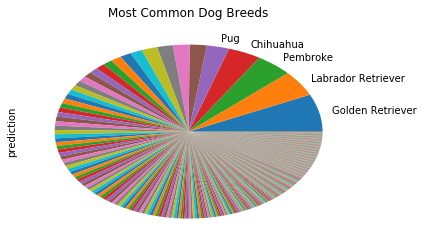

In [49]:
labels = np.full(len(twitter_arc_clean.prediction.value_counts()), '', dtype = object)
labels[0] = 'Golden Retriever'
labels[1] = 'Labrador Retriever'
labels[2] = 'Pembroke'
labels[3] = 'Chihuahua'
labels[4] = 'Pug'
twitter_arc_clean.prediction.value_counts().plot(kind = 'pie', labels = labels)
plt.title('Most Common Dog Breeds')

Ici, nous avons visualisé les prédictions les plus courantes dans un graphique à secteurs et étiqueté les cinq plus courantes. Ensemble, ces cinq représentent près de 25 % de tous les tweets.